In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.spines import Spines

In [62]:
df = pd.read_csv('iot.csv', parse_dates = ['date'])
df = df.dropna()
temp = ['T1', 'T2', 'T3']
humidity = ['RH_1', 'RH_2', 'RH_3']
df_temp = pd.DataFrame(df, columns = temp)
df_humidity = pd.DataFrame(df, columns = humidity)
df.dtypes

date                datetime64[ns]
Appliances(Wmin)             int64
lights(Wmin)                 int64
T1                         float64
RH_1                         int64
T2                         float64
RH_2                         int64
T3                         float64
RH_3                         int64
T_out                      float64
RH_out                       int64
dtype: object

# Temperature

In [3]:
df_temp.describe()

,T1,T2,T3
count,93.000000,93.000000,93.000000
mean,24.359462,22.006774,27.333226
std,2.209544,2.212879,2.005415
min,19.890000,18.900000,23.700000
25%,22.300000,19.200000,25.600000
50%,24.300000,22.100000,27.600000
75%,26.000000,23.600000,28.300000
max,28.000000,25.600000,30.700000


<AxesSubplot:>

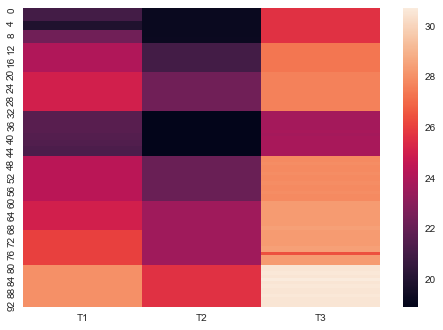

In [4]:
sns.heatmap(df_temp)

# Humidity

In [6]:
df_humidity.describe()

,RH_1,RH_2,RH_3
count,93.000000,93.000000,93.000000
mean,70.247312,70.301075,72.924731
std,1.564941,1.523618,1.807211
min,68.000000,68.000000,69.000000
25%,69.000000,70.000000,71.000000
50%,70.000000,70.000000,73.000000
75%,71.000000,71.000000,74.000000
max,73.000000,73.000000,75.000000


<AxesSubplot:>

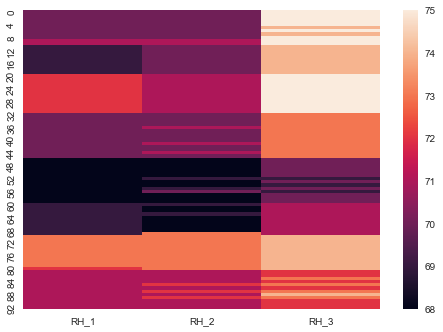

In [7]:
sns.heatmap(df_humidity)

In [9]:
def elbowCurve(y):
  model = KMeans()
  elbow_curve = KElbowVisualizer(model, k = (2,5), timings = False)
  elbow_curve.fit(y)
  elbow_curve.show()

def clusterCenter(n):
  global kmean_y
  global cluster
  kmean_y = KMeans(n_clusters = n).fit(y)
  label = np.array(kmean_y.labels_)
  y_cluster = np.array(kmean_y.cluster_centers_)
  cluster = []
  for i in range(0,n):
    cluster.append(y_cluster[i]) 

c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

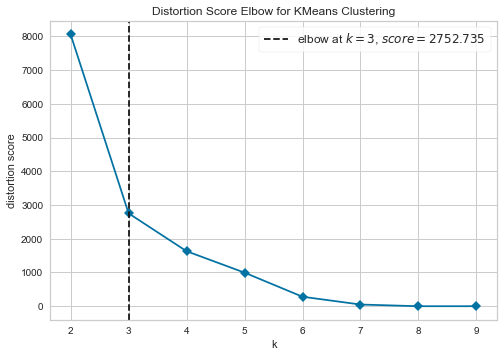

<Figure size 576x396 with 0 Axes>

In [84]:
y = np.array(df.iloc[:,2]).reshape(-1,1)
elbowCurve(y)

In [11]:
#Applying kmeans and Putting labels into an array
n = 3
clusterCenter(n)
print(kmean_y.labels_)
print(kmean_y.cluster_centers_)
print(cluster)

[1 1 1 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 2 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2]
[[45.33333333]
 [22.85714286]
 [ 2.79069767]]
[array([45.33333333]), array([22.85714286]), array([2.79069767])]


c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Now doing the entire process for all 3 rooms for temperature and humidity

# T1 (Kitchen)

c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

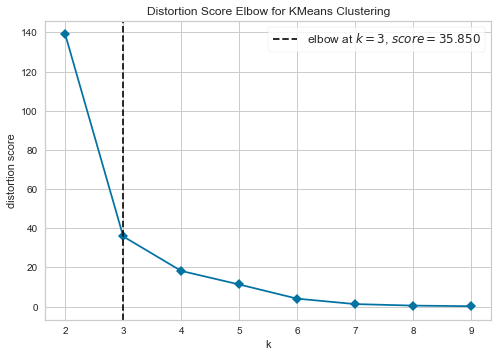

In [12]:
#T1
y = np.array(df.iloc[:,3]).reshape(-1,1)
elbowCurve(y)

In [13]:
n = 3
clusterCenter(n)
print(cluster)

[array([24.868]), array([28.]), array([21.3476])]


c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# T2 (Living Room)

c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

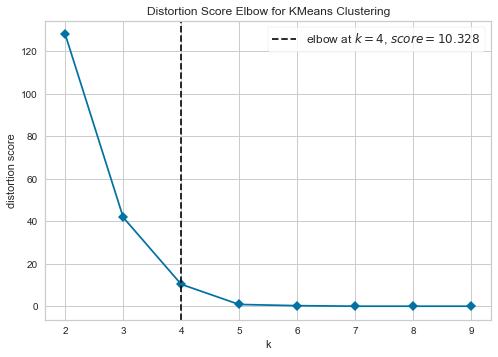

In [14]:
# T2
y = np.array(df.iloc[:,5]).reshape(-1,1)
elbowCurve(y)

In [15]:
n = 4
clusterCenter(n)
print(cluster)

[array([23.6]), array([19.0332]), array([21.88571429]), array([25.6])]


c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# T3 (Laundry area)

c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

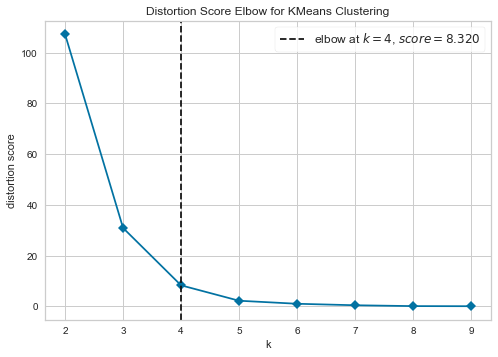

In [16]:
# T3
y = np.array(df.iloc[:,7]).reshape(-1,1)
elbowCurve(y)

In [17]:
n = 4
clusterCenter(n)
print(cluster)

[array([30.53846154]), array([27.86092593]), array([23.75]), array([25.66666667])]


c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# RH_1 (Humidity) 
# Kitchen area

c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

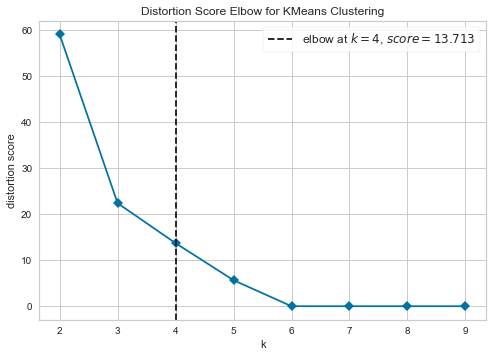

In [18]:
y = np.array(df.iloc[:,4]).reshape(-1,1)
elbowCurve(y)

In [19]:
n = 4
clusterCenter(n)
print(cluster)

c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[array([70.]), array([72.43478261]), array([68.57575758]), array([71.])]


#RH_2 (Humidity)
#Living Room

c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

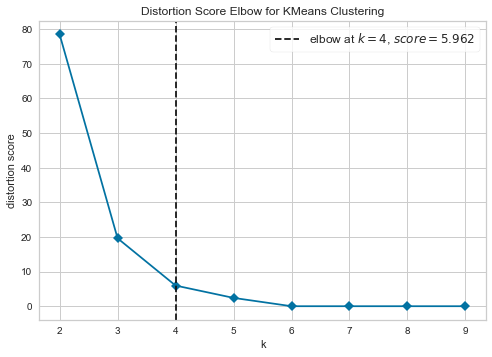

In [20]:
y = np.array(df.iloc[:,6]).reshape(-1,1)
elbowCurve(y)

In [21]:
n = 4
clusterCenter(n)
print(cluster)

[array([71.10344828]), array([68.]), array([73.]), array([69.88235294])]


c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#RH_3 (Humidity)
#Laundry Room

c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

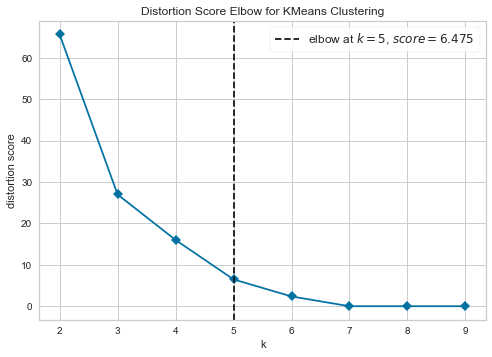

In [22]:
y = np.array(df.iloc[:,8]).reshape(-1,1)
elbowCurve(y)

In [23]:
n = 5
clusterCenter(n)
print(cluster)

[array([69.78571429]), array([74.]), array([71.41176471]), array([75.]), array([73.])]


c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
